<div style="display: flex; justify-content: center;">
  <h1 style="font-size: 40px;">Apprentissage supervisé</h1>
</div>





$\color{red}{\text{IMAOC-6 : 14-26 octobre 2024, Guinée-Conakry}}$
    
$\color{blue}{\text{Ahmed AMMAR <ammar.ahmed@esprit.tn>, Mohamed Hedi Riahi <mohamedhedi.riahi@esprit.tn>}}$

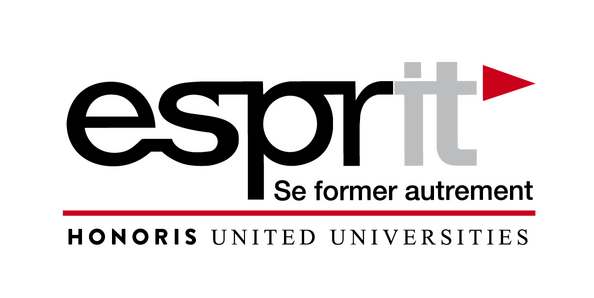
    

## Plan
1. Dataset : 🌦️ **Présentation du jeu de données météorologiques de Seattle** 🌦️
    * Chargement des données
    * Description statistique
    * Matrice de corrélation
    * Scattet Plot
    * Prétraitement des données
    * Division du dataset en train et test
2. Apprentissage supervisé : **Applications des modèles de classification**
    * Modèle 1 : K-Nearest Neighbors (KNN)
    * Modèle 2 : Arbre de Décision
    

### Importation des bibliothèques

In [1]:
import pandas as pd # une bibliothèque pour la manipulation et l'analyse de données
import numpy as np # une bibliothèque pour la manipulation des matrices
import matplotlib.pyplot as plt # une bibliothèque pour la création des graphiques
import seaborn as sns # une bibliothèque pour la visualisation de données
import warnings
from IPython.display import Image # une classe pour l'affichage d'images dans les notebooks Jupyter
from sklearn.preprocessing import LabelEncoder # une classe pour encoder des variables catégorielles
from sklearn.preprocessing import OneHotEncoder # une classe pour encoder des variables catégorielles
from sklearn.compose import ColumnTransformer # Une classe pour transformer des colonnes
from sklearn.preprocessing import StandardScaler # pour mettre à l’échelle vos caractéristiques numériques
# Importer les metriques
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score, confusion_matrix, classification_report
warnings.filterwarnings('ignore')

### Objectifs du TP

1. Explorer une base de données et la préparer
2. Créer un `train_set` et un `test_set` avec la fonction `train_test_split()`
3. Appliquer 2 modèles de classification :
    * KNN
    * Decision tree
4. Valider un modèle avec la technique de `cross validation`
5. Améliorer un modèle en utilisant `GridSearchCV`

## Dataset : 🌦️ **Présentation du jeu de données météorologiques de Seattle** 🌦️

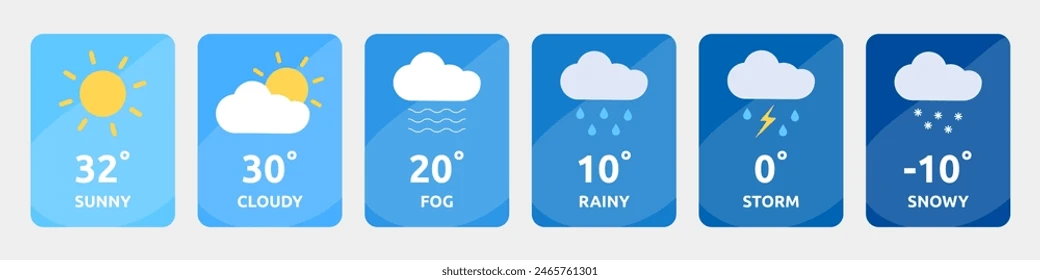

L'analyse du climat à Seattle consiste à comprendre diverses variables météorologiques enregistrées quotidiennement. Grâce au fichier *seattle-weather.csv*, nous pouvons explorer les tendances météorologiques, les changements saisonniers et prédire les conditions météorologiques futures à Seattle.  
Le jeu de données contient les caractéristiques suivantes :

🔍 **Aperçu du jeu de données** :

📅 **Date** : La date des relevés météorologiques.

☔ **Précipitations** : La quantité de précipitations (en mm) enregistrée ce jour-là.

🌡️ **Temp_max** : La température maximale (en degrés Celsius) enregistrée ce jour-là.

🌡️ **Temp_min** : La température minimale (en degrés Celsius) enregistrée ce jour-là.

💨 **Vent** : La vitesse du vent (en m/s) enregistrée ce jour-là.

🌦️ **Météo** : Le type de temps (ex : bruine, pluie).

### Chargement des données
Utilisez pandas pour charger et examiner les premières lignes du dataset.

In [ ]:
df = pd.read_csv('seattle-weather.csv')

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
# taille du data
df.shape

In [ ]:
# valeur nulle
df.isnull().sum()

### Description statistique

In [ ]:
# information data
df.info()

In [ ]:
# statistique data
df.describe()

In [ ]:
# statistique data object
df.describe(include =['object'])

In [ ]:
df.describe(include ='all')

In [ ]:
df['weather'].value_counts()

In [ ]:
del df['date']
df

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['weather_encode'] = le.fit_transform(df['weather'])
df

### Matrice de corrélation

In [ ]:
cor=df.drop(["weather"], axis = 1).corr()
plt.figure(figsize=(8,4))
sns.heatmap(cor,annot=True)
plt.show()


### Scattet Plot

In [ ]:
sns.set(style="ticks")
sns.pairplot(df, hue="weather")
plt.show()

### Prétraitement des données
Séparation des variables explicatives et cible :

In [ ]:
# Supprimer les colonnes inutiles
X = df.drop(['weather', 'weather_encode'], axis = 1)
y = df['weather_encode']

In [ ]:
# affichage X
X.head()

In [ ]:
# affichage y
y.head()

In [ ]:
X.columns

### Division du dataset en train et test
Diviser l'ensemble de données en deux parties - Formation (70%) et Test (30%) x_train, y_train sont les variables de formation et x_test, y_test sont les variables de test.
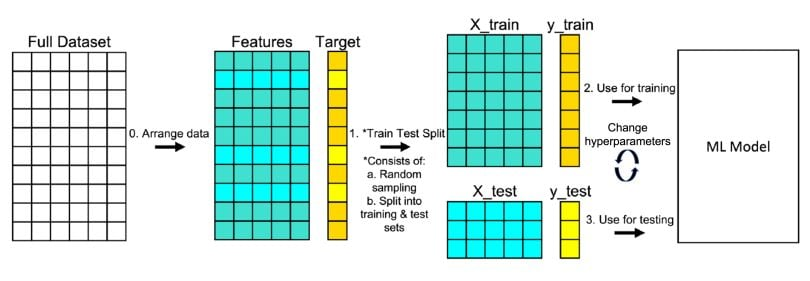


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Apprentissage supervisé : Applications des modèles de classification

### Modèle 1 : K-Nearest Neighbors (KNN)

Le modèle **K-Nearest Neighbors (KNN)** est un algorithme de classification basé sur la proximité des données. Il utilise les points de données les plus proches pour classer un nouvel exemple, en fonction de la majorité des classes de ses voisins.

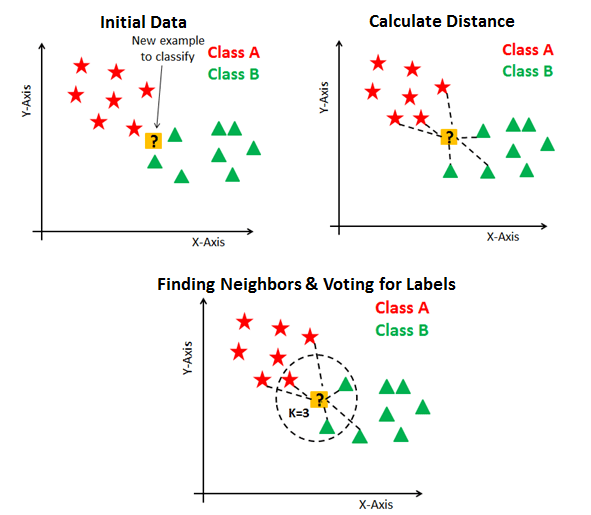

**Comment fonctionne KNN ?**
   Lorsque le modèle KNN reçoit un nouvel exemple à classer (ici un nouveau client), il va :
   - Calculer la distance (souvent **euclidienne**) entre ce point et tous les points d'entraînement.
   - Trouver les **k voisins les plus proches**.
   - Classer le point en fonction de la majorité des classes de ces voisins (par exemple, si la majorité des voisins sont des clients qui n'ont pas quitté, le modèle prédit que le nouveau client ne partira pas).

**Calcul de la distance euclidienne :**
   Pour chaque nouvelle observation à prédire, la distance euclidienne est calculée entre ce point et chaque point du jeu de données météorologiques d'entraînement. La formule de la distance euclidienne dans un espace à \(d\) dimensions est :

   $$ d(X, Y) = \sqrt{\sum_{i=1}^{d} (X_i - Y_i)^2} $$

   où \(X\) et \(Y\) représentent deux jours avec leurs caractéristiques météorologiques, et \(d\) est le nombre de dimensions (ou caractéristiques) utilisées dans le modèle.

   Par exemple, pour deux jours ayant les caractéristiques \(X\) et \(Y\) avec les valeurs de leurs **Temp_max**, **Temp_min**, **Precipitations**, **Vent**, etc., cette formule est utilisée pour calculer la distance entre eux. Plus la distance est petite, plus les conditions météorologiques de ces deux jours sont similaires.

### Normalisation des données

Le modèle KNN est simple mais puissant dans les problèmes de classification, notamment pour la prédiction des conditions météorologiques. Cependant, il est sensible à la qualité des données et nécessite généralement une **mise à l'échelle** des variables pour garantir des calculs de distance corrects, car certaines variables peuvent avoir des amplitudes très différentes (par exemple, **Precipitations** pourrait être en millimètres, tandis que **Temp_max** est en degrés Celsius).

La **normalisation des données** peut ainsi être nécessaire pour que chaque variable ait la même influence sur le calcul de la distance.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

1. **Importation et initialisation du modèle KNN :**
   Vous pouvez importer le modèle **KNeighborsClassifier** de la bibliothèque scikit-learn. Lors de l'initialisation, le paramètre clé est **k**, le nombre de voisins que l'on souhaite prendre en compte pour faire la classification. Dans cet exemple, nous fixons initialement k à 5.

In [ ]:
# KNeighborsClassifier avec n_neighbors = 5
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# KNeighborsClassifier?

   - **k-neighbors (k)** : Ce paramètre détermine combien de voisins le modèle va prendre en compte pour effectuer une classification. Un **k** trop petit peut rendre le modèle sensible au bruit, tandis qu'un **k** trop grand peut lisser trop les décisions et rendre le modèle moins flexible. Ici, nous fixons **k = 5**, mais ce paramètre sera ajusté lors du réglage des hyperparamètres.

2. **Entraînement du modèle KNN** :
   Le modèle KNN est ensuite ajusté (ou "entraîné") sur le jeu de données d'entraînement. Cela signifie que le modèle va simplement stocker les données d'entraînement, car KNN est un **modèle basé sur les instances** (pas un modèle paramétrique), où aucune règle explicite n'est apprise lors de l'entraînement.

In [ ]:
# entrainer
KNN.fit(X_train, y_train)


- **X_train_scaled** représente les caractéristiques **normalisées** des observations météorologiques (par exemple, **Temp_max**, **Temp_min**, **Precipitations**, **Vent**, etc.).
- **y_train** est la variable cible, qui dans ce cas est la colonne **Weather**, indiquant le type de météo (par exemple, bruine, pluie, etc.).

### Évaluation du modèle :

In [ ]:
# calculer y_pred
y_pred = KNN.predict(X_test)

In [ ]:
# affichage y_test[i], y_pred_knn[i]
print(np.array(y_test)) # y_test converti en np.ndarray pour l'affichage
print(y_pred)
print(KNN.score(X_test, y_test))

In [ ]:
# Importer les metriques
from sklearn.metrics import accuracy_score, precision_score, recall_score ,f1_score, confusion_matrix, classification_report

 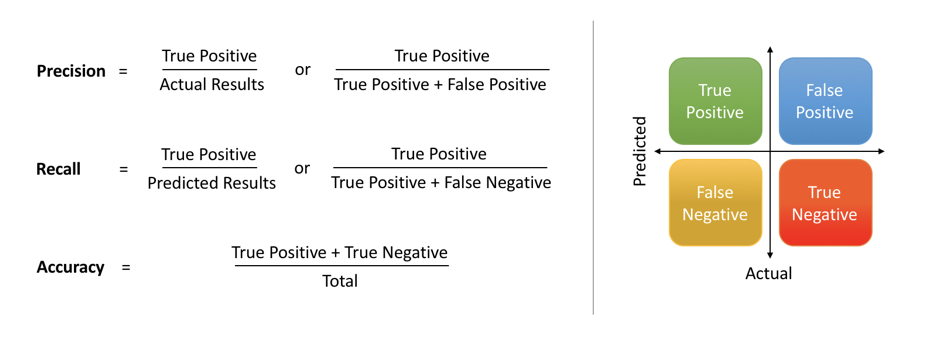

#### Matrice de confusion

In [ ]:
# Create a confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualiser la matrice de confusion avec un heatmap
plt.figure(figsize=(7, 5), dpi=100)
sns.heatmap(conf_matrix, annot=True, fmt="d",
            xticklabels=['Rain', 'Sun', 'Fog', 'Drizzle', 'Snow'],
            yticklabels=['Rain', 'Sun', 'Fog', 'Drizzle', 'Snow'])
plt.ylabel('Véritables catégories')
plt.xlabel('Prédictions')
plt.title('Matrice de Confusion pour les Prédictions Météo')
plt.show()


In [ ]:
print(classification_report(y_test, y_pred))

##### Validation croisée et réglage des hyperparamètres

##### Validation croisée
La **validation croisée** est une technique d’évaluation qui consiste à diviser le jeu de données en plusieurs sous-ensembles (appelés **folds**). Le modèle est entraîné sur certains de ces sous-ensembles et testé sur les autres. Cette rotation entre les sous-ensembles permet d’obtenir une estimation plus fiable des performances du modèle, réduisant les risques de sur-apprentissage ou de sous-apprentissage.

**Exemple** : Pour une validation croisée à 5 plis (5-fold cross-validation), les données sont divisées en 5 parties. Le modèle est entraîné sur 4 parties et testé sur la partie restante, et cela est répété 5 fois.

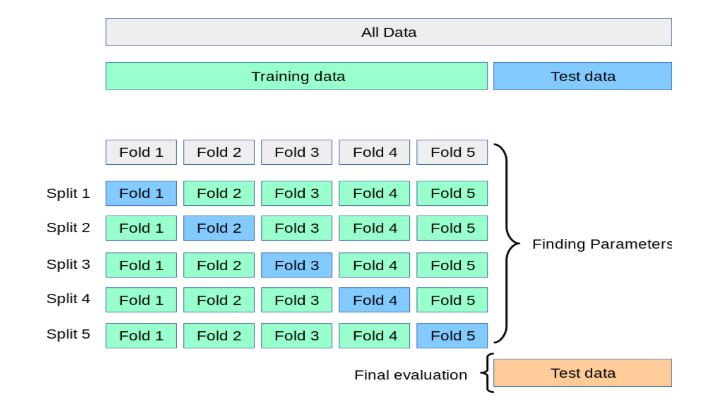

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': range(1, 20), 'metric':['euclidean', 'manhattan', 'minkowski'], 'weights':['uniform', 'distance']}
# Application de GridSearchCV avec validation croisée
grid_KNN = GridSearchCV(KNN, param_grid, cv=5)
grid_KNN.fit(X_train, y_train)
print(grid_KNN.best_params_)

In [ ]:
# calcul de la nouvelle y_pred
Final_model = KNeighborsClassifier(metric ='manhattan', n_neighbors = 17, weights = 'distance')

In [ ]:
Final_model

In [ ]:
# Performance du modèle optimal
Final_model = grid_KNN.best_estimator_

In [ ]:
Final_model

Les **hyperparamètres** (comme le nombre de voisins \(k\) pour KNN) influencent les performances du modèle, mais ne sont pas appris directement à partir des données. Pour trouver les meilleurs hyperparamètres, on utilise des techniques comme **GridSearchCV**, qui effectue une recherche sur plusieurs combinaisons d’hyperparamètres en utilisant la validation croisée.

In [ ]:
# Meilleur k trouvé
best_k = grid_KNN.best_params_['n_neighbors']

In [ ]:
Final_model.fit(X_train, y_train)
print('train score = ', Final_model.score(X_train, y_train))
print('test score = ', Final_model.score(X_test, y_test))
print(f'Score du modèle KNN avec {best_k} voisins : {Final_model.score(X_test, y_test)}')


In [ ]:
y_pred_knn = Final_model.predict(X_test)
# Précision, rappel et F1-score pour KNN
print(classification_report(y_test, y_pred_knn))

#### Application :

"Soit un employé, âgé de 30 ans, avec un score de crédit de 550 et un salaire estimé à 50 000 €, risque-t-il de quitter l'entreprise selon le modèle KNN ?"

In [ ]:
df.columns

In [ ]:
nouvelles_donnees_meteo = pd.DataFrame({
    'precipitation': [0.0, 0.5, 0.2],
    'temp_max': [12.2, 15.3, 18.9],
    'temp_min': [5.6, 8.3, 10.2],
    'wind': [4.7, 2.6, 3.9],
})

nouvelles_donnees_meteo_scaled = scaler.transform(nouvelles_donnees_meteo)

predictions_meteo = KNN.predict(nouvelles_donnees_meteo_scaled)  # Ou Final_model.predict(nouvelles_donnees_meteo_scaled)

labels_meteo = le.inverse_transform(predictions_meteo)
print("Prédictions météo :", labels_meteo)

### Modèle 2 : Arbre de Décision

L'algorithme construit un arbre basé sur des critères comme l'entropie ou l'indice de Gini pour déterminer les facteurs les plus influents dans la décision du type de météo (**Weather**) à prévoir (par exemple, bruine, pluie, etc.).

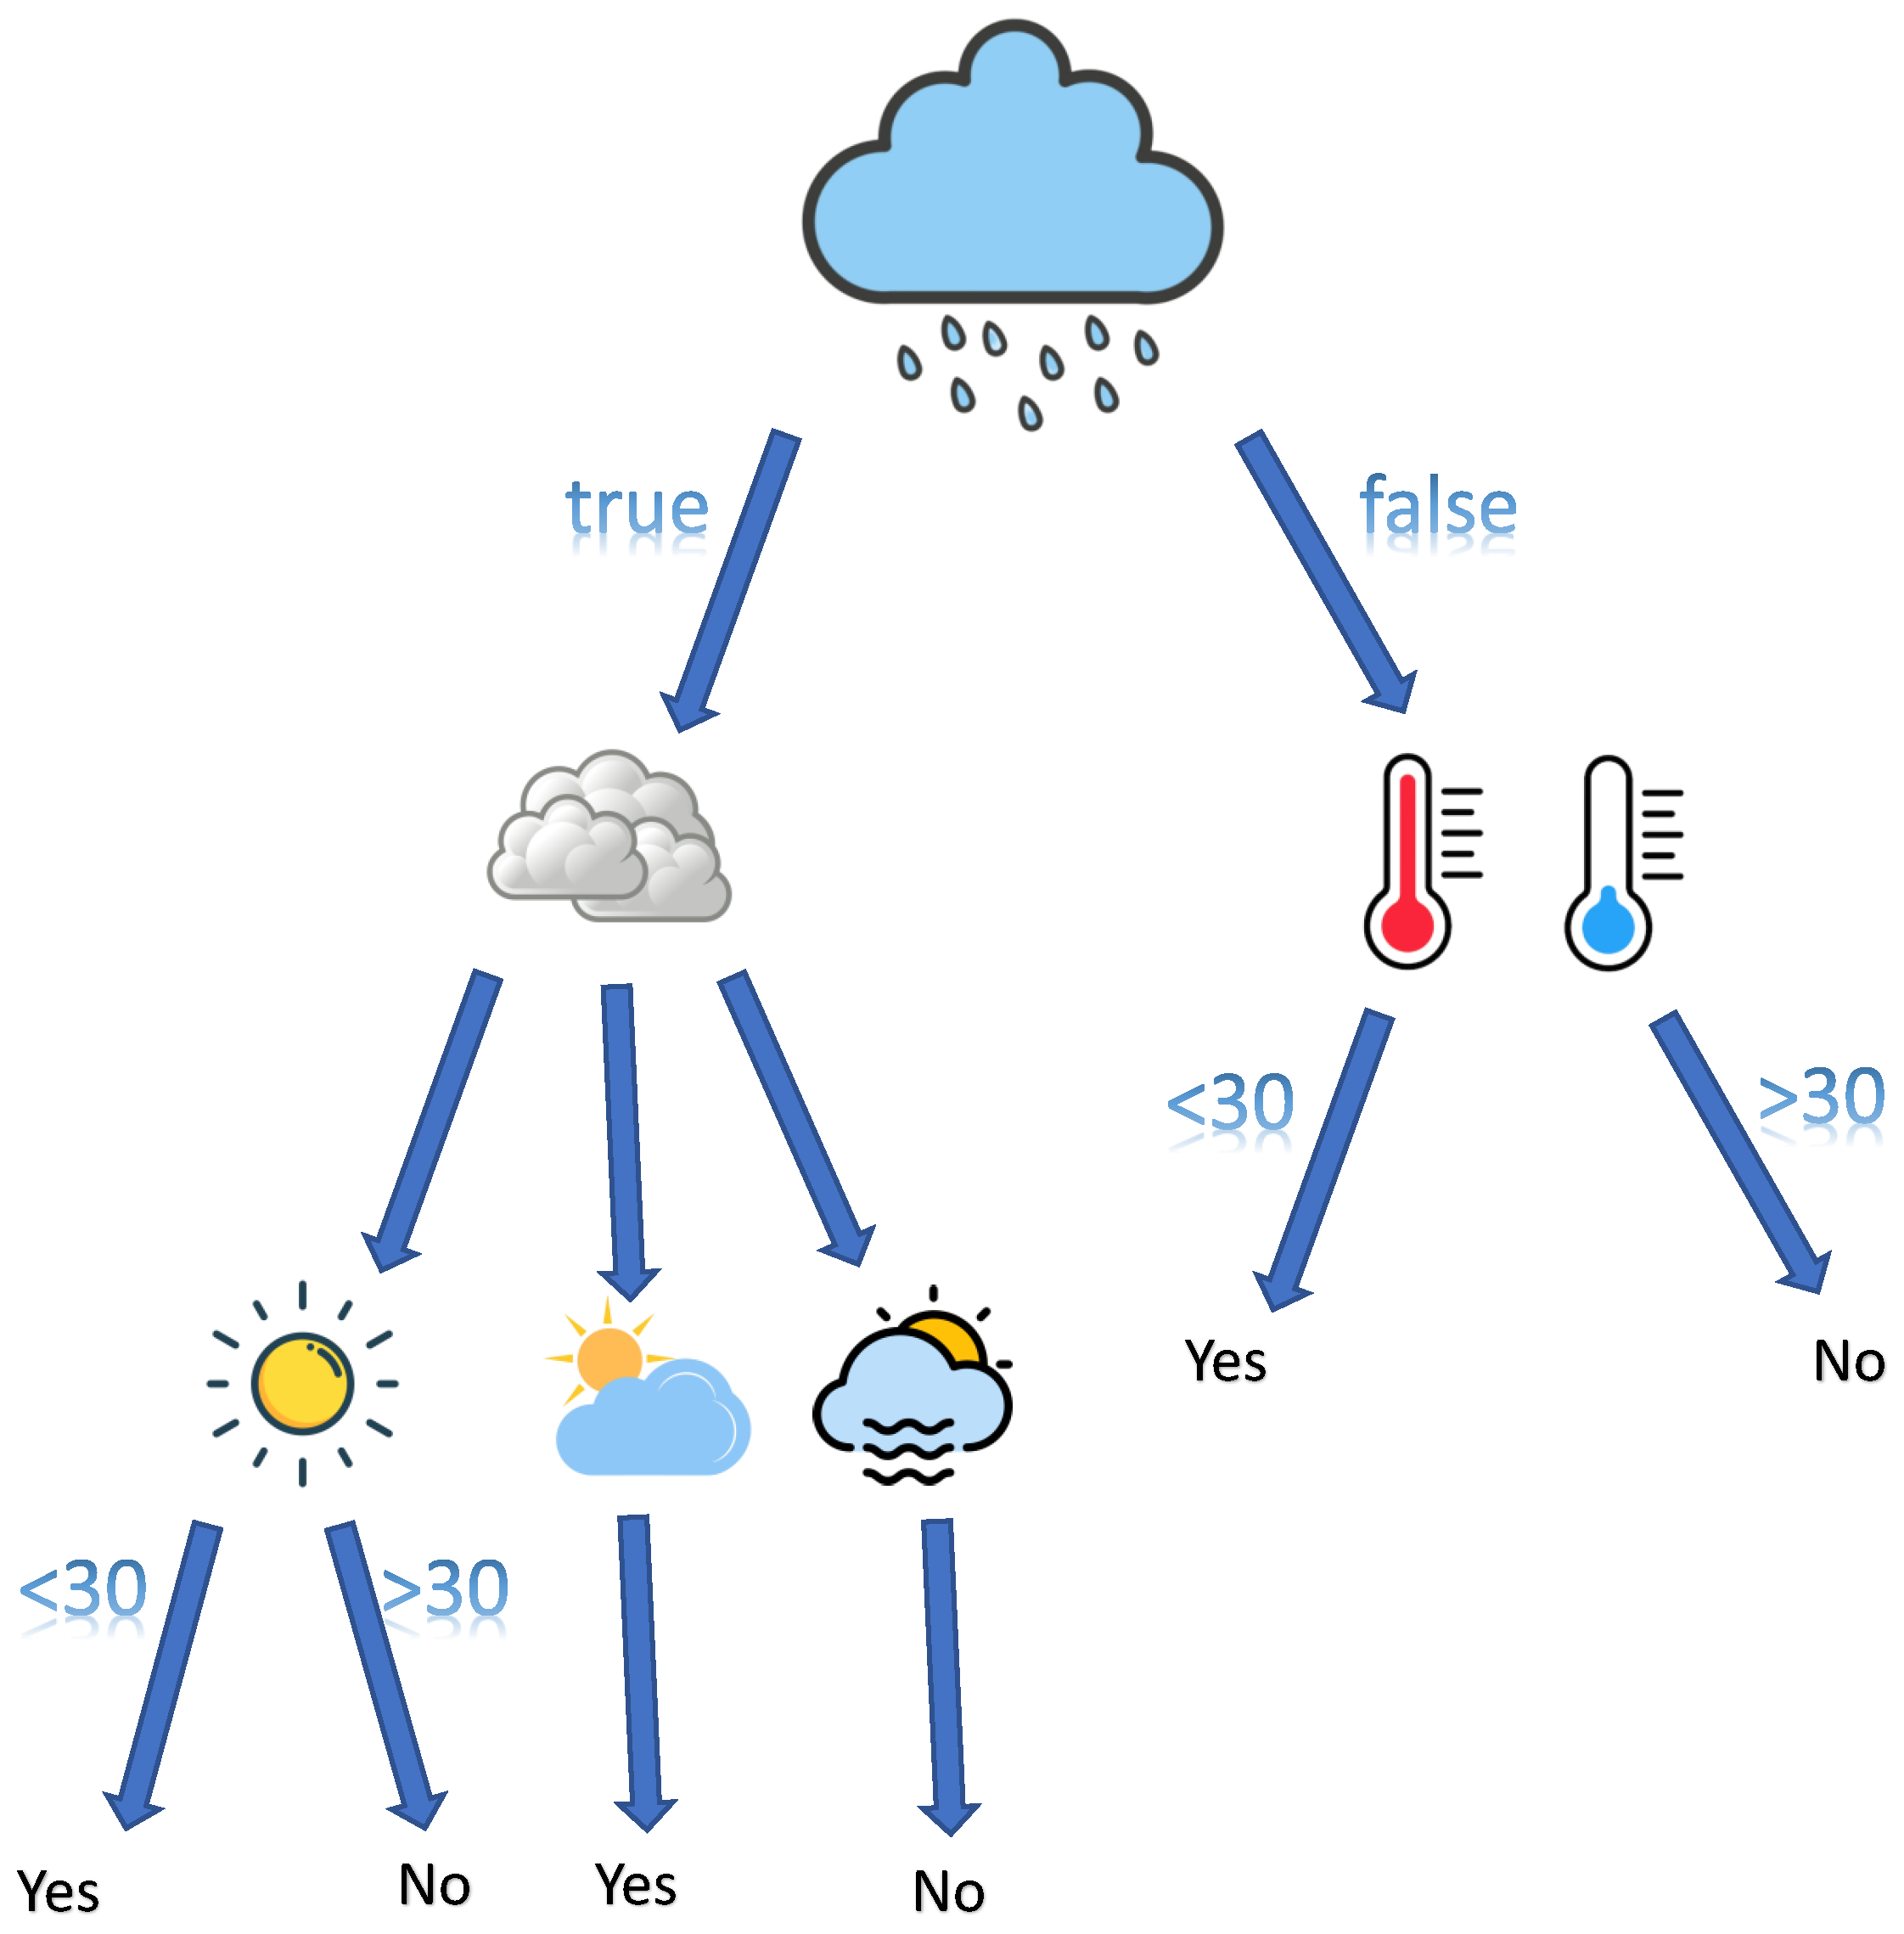

Les arbres de décision n'utilisent pas de mesures de distance pour classer les données. Ils se basent sur des critères comme **l'entropie** ou **l'indice de Gini** pour découper l'espace des caractéristiques. Cela signifie que les valeurs absolues des caractéristiques n’ont pas d’impact sur la manière dont l’arbre prend des décisions.

$$\text{Gini} = 1 - \sum_{i=1}^{C} p_i^2$$
Où :

* $C$ est le nombre de classes.
* $p_i$ est la proportion de la classe $i$ dans l'ensemble de données, $p_i = \frac{n_i}{N}$.


**Pas besoin de normalisation :** Les arbres de décision ne sont pas sensibles aux échelles des caractéristiques, car ils ne comparent pas directement les valeurs entre elles pour prendre des décisions.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Initialisation du modèle d'arbre de décision

L'initialisation du modèle d'arbre de décision consiste à créer une instance de l'algorithme et à l'ajuster (l'entraîner) sur les données d'entraînement.

1. **Création du modèle** : On initialise l'arbre de décision en définissant des paramètres comme la profondeur maximale de l'arbre, le critère de décision (entropie ou Gini), et le nombre minimum d'échantillons par feuille.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini', max_depth=5)

2. **Ajustement (fit)** : Le modèle est ensuite ajusté aux données d'entraînement. L'algorithme utilise les caractéristiques (features) des données pour apprendre des règles de décision en découpant l'espace de caractéristiques de façon récursive.

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

3. **Création de l'arbre** :

Durant l'ajustement, le modèle divise les données à chaque nœud selon les critères choisis (Gini, entropie), créant ainsi une structure d'arbre où chaque branche représente une décision, et chaque feuille représente une classe de sortie (par exemple, le type de météo, comme bruine ou pluie).

L'entraînement d'un arbre de décision permet donc au modèle d'apprendre les relations entre les variables d'entrée et la classe à prédire, en créant des règles qui optimisent la classification des échantillons de données.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

### Évaluation du modèle :

In [ ]:
# calculer y_pred
y_pred = tree.predict(X_test)

In [ ]:
# affichage y_test[i], y_pred_tree[i]
print(np.array(y_test)) # y_test converti en np.ndarray pour l'affichage
print(y_pred)
print(tree.score(X_test, y_test))

#### Matrice de confusion

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualiser la matrice de confusion avec un heatmap
plt.figure(figsize=(7, 5), dpi=100)
sns.heatmap(conf_matrix, annot=True, fmt="d",
            xticklabels=['Rain', 'Sun', 'Fog', 'Drizzle', 'Snow'],
            yticklabels=['Rain', 'Sun', 'Fog', 'Drizzle', 'Snow'])
plt.ylabel('Véritables catégories')
plt.xlabel('Prédictions')
plt.title('Matrice de Confusion pour les Prédictions Météo')
plt.show()


In [ ]:
print(classification_report(y_test, y_pred))

##### Visualisation

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualisation de l'arbre de décision
plt.figure(figsize=(50,15), dpi = 200)  # Augmenter la taille de la figure
plot_tree(model,
          filled=True,
          feature_names=X_train.columns,  # Noms des caractéristiques
          class_names=["Classe 0", "Classe 1", "Classe 2", "Classe 3", "Classe 4"],  # Noms des classes
          rounded=True,
          fontsize=14)  # Augmenter la taille de la police

plt.tight_layout()
plt.savefig("tree_model.png", dpi = 200)
plt.show()


#### Réglage des hyperparamètres avec GridSearchCV :
Optimisez la profondeur maximale de l'arbre avec GridSearchCV.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid_tree = {'max_depth': range(1, 10)}
grid_tree = GridSearchCV(tree, param_grid_tree, cv=5)
grid_tree.fit(X_train, y_train)
print(grid_tree.best_params_)

In [ ]:
# Utiliser la profondeur optimale trouvée par GridSearchCV
optimal_depth = 4  # Ce que GridSearchCV a donné
# Initialisation du modèle avec la profondeur optimale
optimal_tree = DecisionTreeClassifier(max_depth=optimal_depth)

# Entraîner à nouveau le modèle avec les données d'entraînement
optimal_tree.fit(X_train, y_train)

# Visualiser l'arbre avec plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(48,10), dpi = 200)  # Taille ajustée
plot_tree(optimal_tree,
          filled=True,
          feature_names=X_train.columns,  # Noms des caractéristiques
          class_names=["Classe 0", "Classe 1", "Classe 2", "Classe 3", "Classe 4"],  # Noms des classes
          rounded=True,
          fontsize=12)  # Taille de la police ajustée
plt.savefig("tree_optimal_model.png", dpi = 200)
plt.show()

In [ ]:
# features importances
for var,importance in zip(df.columns,optimal_tree.feature_importances_):
    if importance!=0:
        print(var,'=',importance)

In [ ]:
def weather_feature_importances_plot(model, features):
    """Plots feature importances for a given model.

    Args:
        model: The trained model.
        features: The list of features used by the model.
    """
    plt.figure(figsize=(10, 5))
    plt.barh(range(len(features)), model.feature_importances_, align='center', color='red')
    plt.yticks(np.arange(len(features)), features)
    plt.title('Breast Cancer Decision Trees Features Importances')
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.grid(True)

# Assuming X_train contains the features used for training
weather_feature_importances_plot(optimal_tree, X_train.columns)
plt.show()

In [ ]:
from sklearn.tree import export_text
print(export_text(optimal_tree,feature_names=X.columns,show_weights=True ))

In [ ]:
y_pred_tree = optimal_tree.predict(X_test)
# Précision, rappel et F1-score pour DecisionTree
print(classification_report(y_test, y_pred))



### Comparaison des Modèles

**Tableau Comparatif des Résultats** :

| Modèle               | Précision (macro avg) | Précision (weighted avg) | Rappel (macro avg) | Rappel (weighted avg) | F1-Score (macro avg) | F1-Score (weighted avg) |
|----------------------|-----------------------|--------------------------|--------------------|-----------------------|----------------------|-------------------------|
| KNN                  | 61.00%                | 73.00%                   | 39.00%             | 76.00%                | 40.00%               | 73.00%                  |
| Arbre de décision    | 45.00%                | 76.00%                   | 47.00%             | 74.00%                | 46.00%               | 75.00%                  |

---


### Conclusion

1. Analysez les résultats de performance.
2. Identifiez le meilleur modèle selon les métriques choisies (par exemple, AUC).
3. Discutez des avantages et inconvénients de chaque modèle dans le cadre de la prédiction du churn.

---

Ce TP vous guide à travers les étapes clés de l'analyse d'un dataset de churn, de la **préparation des données** à l'**optimisation des modèles**, tout en vous permettant de comparer deux algorithmes de classification supervisée populaires : KNN et arbre de décision.